# Synthetic Example

This notebook shows how to use the algorithm for spike inference on a synthetic example.

In [1]:
from spikeFRInder import sliding_window_predict

In [2]:
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt
%matplotlib inline

## Function to Generate Synthetic Signal

In [3]:
def generate_signal(FR, tau_decay, Fs, noise_sigma, duration):
    dt = 1 / Fs
    N = int(duration / dt)
    spikes = np.random.rand(N) < FR * dt
    num_spikes = np.sum(spikes)
    amplitudes = np.random.normal(loc=1, scale=0.5, size=(num_spikes,))
    amplitudes[amplitudes<0.2] = 0.25
    spike_train = np.zeros(spikes.shape)
    spike_train[spikes==True] = amplitudes    
    t = np.arange(-duration//2, duration//2, dt)
    exponential = np.zeros_like(t)
    exponential[t>=0] = np.exp(-t[t>=0]/tau_decay)
    signal = convolve(spikes, exponential, mode='same')
    signal += np.random.normal(scale=noise_sigma, size=signal.size)
    time = np.arange(0, duration, dt)
    return signal, spikes, time, num_spikes

## Estimate Spikes

In [4]:
# Generate calcium signal
np.random.seed(100)
FR = 1 # average firing rate over time
tau_decay = 0.25 # true decay rate of exponentials
Fs = 50 # sampling rate
noise_sigma = 0.15 # STD of gaussian noise
duration = 30 # full signal duration in seconds

signal, spikes, time, num_spikes = generate_signal(FR, tau_decay, Fs, noise_sigma, duration)
print('True number of spikes = {}'.format(num_spikes))
print('Assumed number of spikes input to the method = {}'.format(int(FR*duration)))

# Estimate spikes
output = sliding_window_predict(signal,
                                Fs=50,
                                K=FR*duration,
                                window_lengths=[101, 201, 301],
                                jump_size=15,
                                smoothing_sigma=1.5)


True number of spikes = 24
Assumed number of spikes input to the method = 30


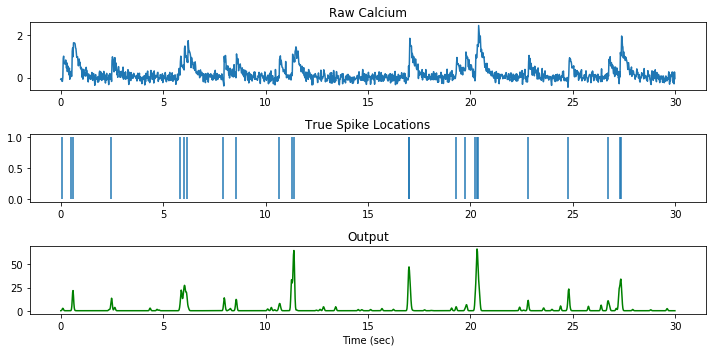

In [5]:
fig, ax = plt.subplots(3,1, figsize=(10, 5))
ax[0].plot(time, signal)
ax[0].set_title('Raw Calcium')
ax[1].stem(time, spikes, use_line_collection=True, markerfmt=" ", basefmt=" ")
ax[1].set_title('True Spike Locations')
ax[2].plot(time, output, 'g')
ax[2].set_title('Output')
ax[2].set_xlabel('Time (sec)')
plt.tight_layout()
plt.show()